In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('emissions_medium_granularity.csv')


In [3]:
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [4]:
df.tail()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
12546,2020,YPF,State-owned Entity,Natural Gas,394.0,Bcf/yr,28.718814
12547,2021,YPF,State-owned Entity,Oil & NGL,90.0,Million bbl/yr,35.890011
12548,2021,YPF,State-owned Entity,Natural Gas,403.0,Bcf/yr,29.374827
12549,2022,YPF,State-owned Entity,Oil & NGL,98.0,Million bbl/yr,39.080234
12550,2022,YPF,State-owned Entity,Natural Gas,423.0,Bcf/yr,30.832635


In [5]:
df.shape

(12551, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [7]:
df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


In [8]:
df.nunique()

year                        169
parent_entity               122
parent_type                   3
commodity                     9
production_value          11750
production_unit               4
total_emissions_MtCO2e    12106
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='all')


,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
count,12551.000000,12551,12551,12551,12551.000000,12551,12551.000000
unique,NaN,122,3,9,NaN,4,NaN
top,NaN,Westmoreland Mining,Investor-owned Company,Oil & NGL,NaN,Million tonnes/yr,NaN
freq,NaN,507,6583,3733,NaN,5103,NaN
mean,1987.148116,NaN,NaN,NaN,412.677443,NaN,113.205850
std,29.202455,NaN,NaN,NaN,1357.538128,NaN,329.789848
min,1854.000000,NaN,NaN,NaN,0.004398,NaN,0.000321
25%,1973.000000,NaN,NaN,NaN,10.601353,NaN,8.785294
50%,1994.000000,NaN,NaN,NaN,63.203536,NaN,33.058688
75%,2009.000000,NaN,NaN,NaN,320.664764,NaN,102.154596


In [11]:
df.isnull().sum()


year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
production_unit           0
total_emissions_MtCO2e    0
dtype: int64

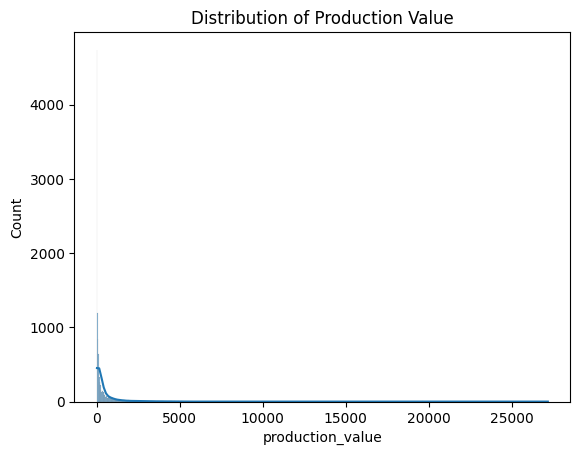

In [13]:
# Distribution of numerical columns
sns.histplot(df['production_value'], kde=True)
plt.title('Distribution of Production Value')
plt.show()

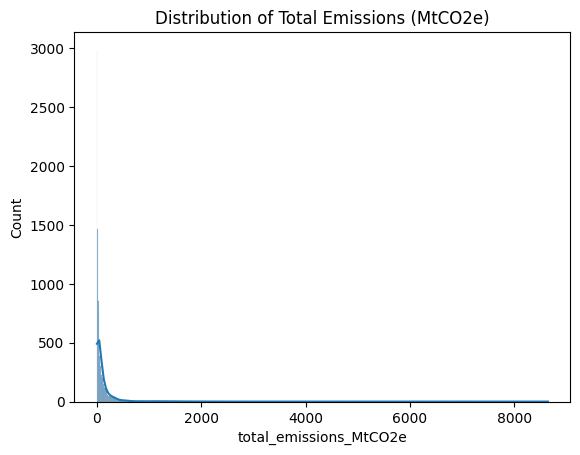

In [14]:
sns.histplot(df['total_emissions_MtCO2e'], kde=True)
plt.title('Distribution of Total Emissions (MtCO2e)')
plt.show()

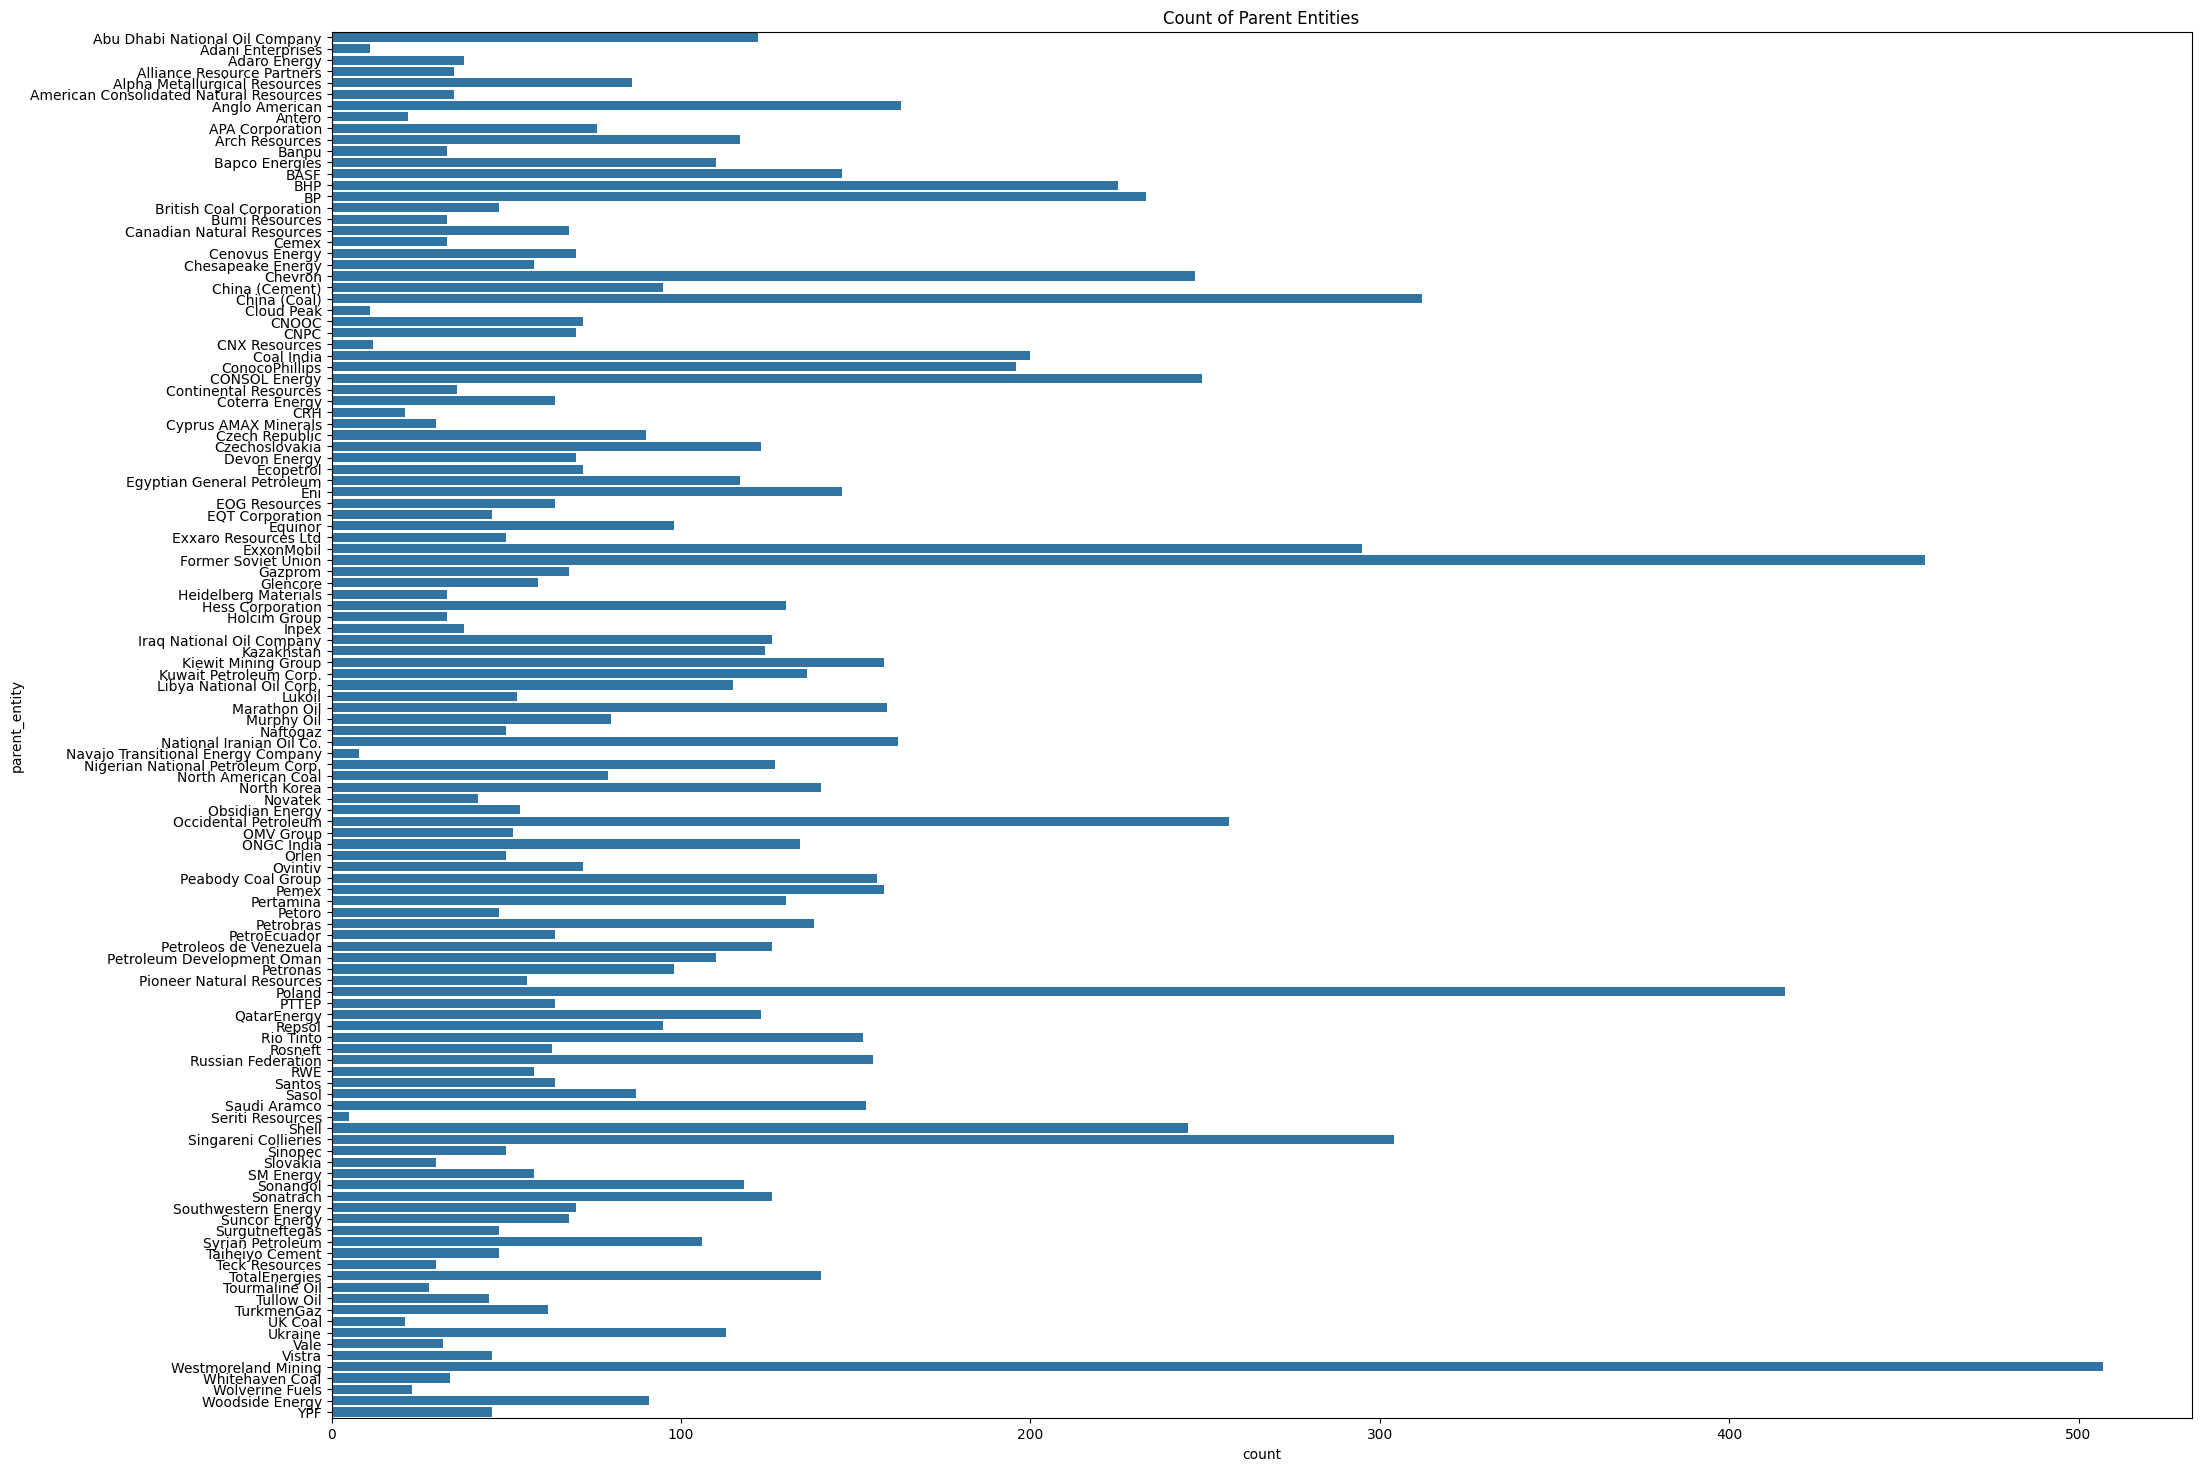

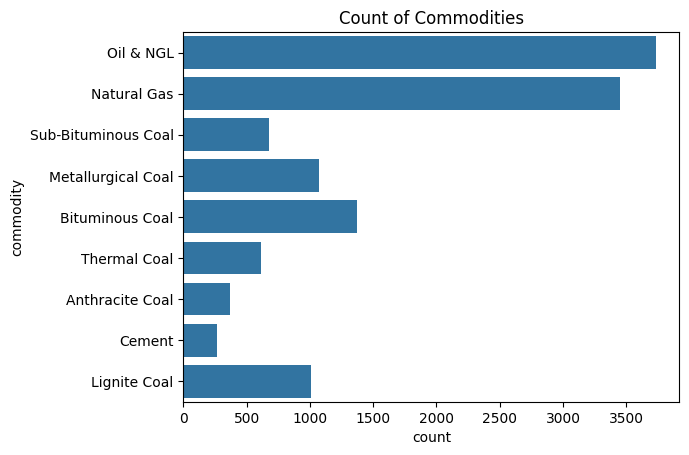

In [15]:
# Countplot for categorical columns
plt.figure(figsize=(24, 18))
sns.countplot(y=df['parent_entity'])
plt.title('Count of Parent Entities')
plt.show()

sns.countplot(y=df['commodity'])
plt.title('Count of Commodities')
plt.show()

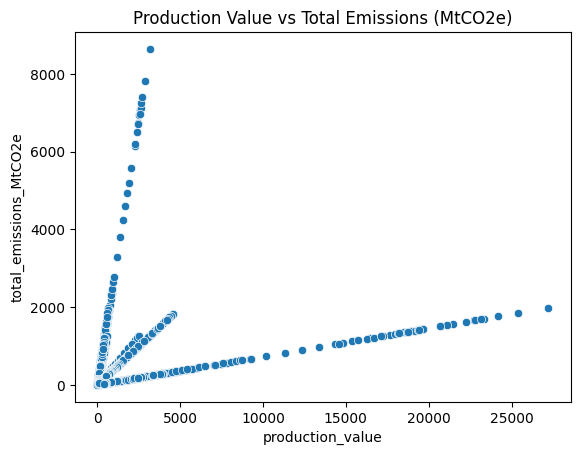

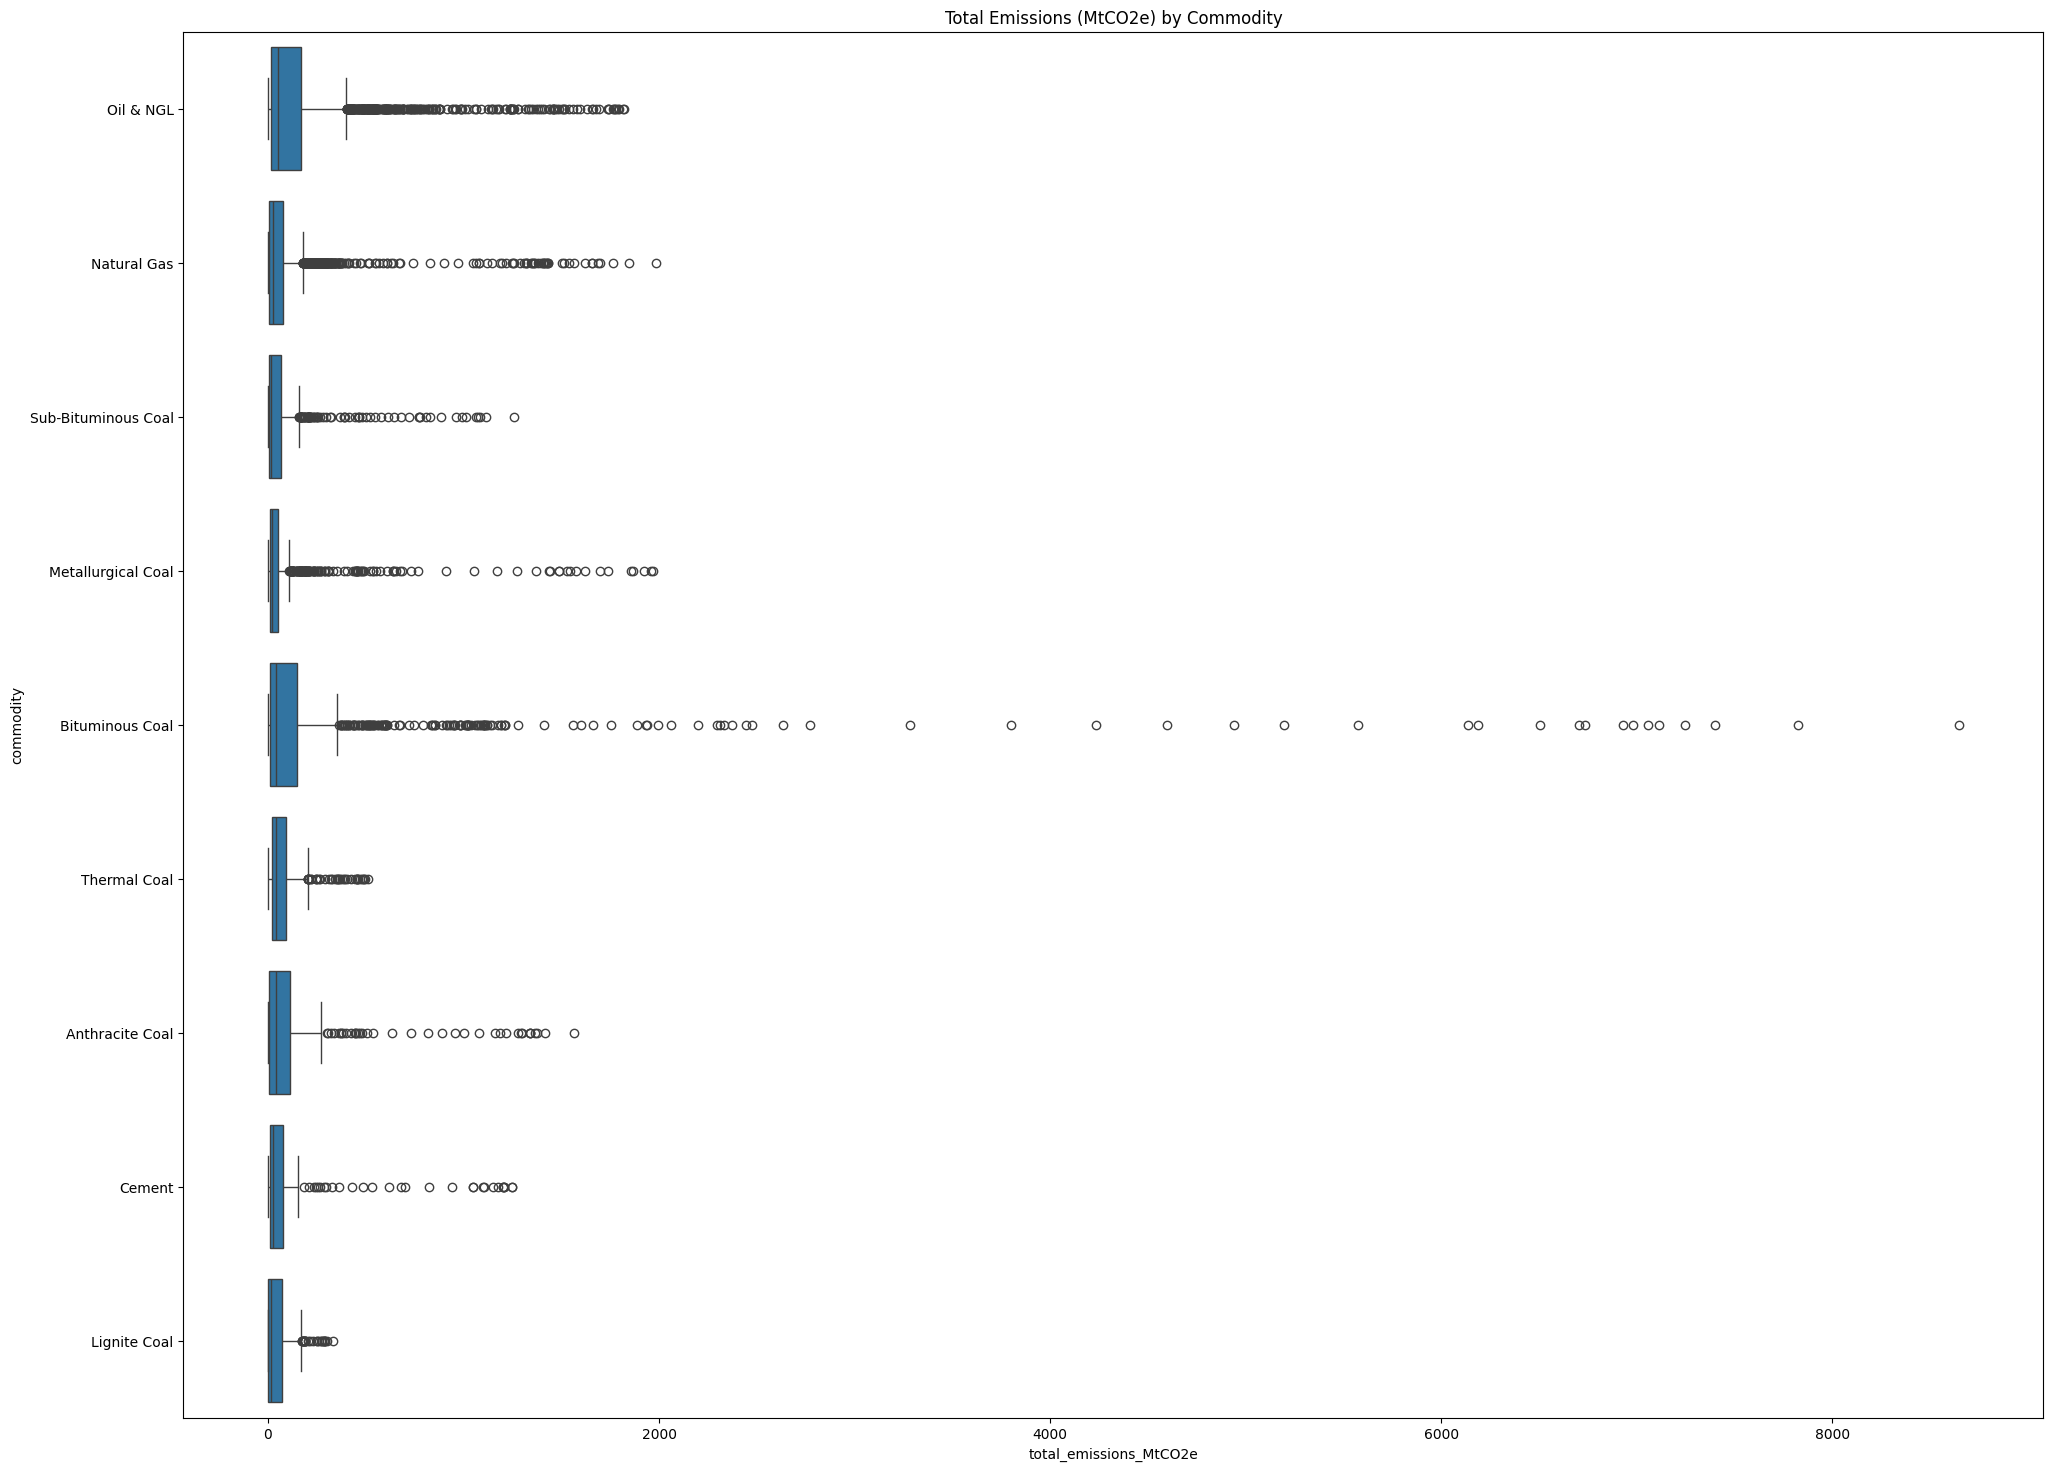

In [16]:
# Scatter plot of production_value vs total_emissions_MtCO2e
sns.scatterplot(data=df, x='production_value', y='total_emissions_MtCO2e')
plt.title('Production Value vs Total Emissions (MtCO2e)')
plt.show()

# Boxplot of total_emissions_MtCO2e by commodity
plt.figure(figsize=(24, 18))
sns.boxplot(x='total_emissions_MtCO2e', y='commodity', data=df)
plt.title('Total Emissions (MtCO2e) by Commodity')
plt.show()

In [17]:
# Correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                            year  production_value  total_emissions_MtCO2e
year                    1.000000          0.114833                0.104630
production_value        0.114833          1.000000                0.403559
total_emissions_MtCO2e  0.104630          0.403559                1.000000


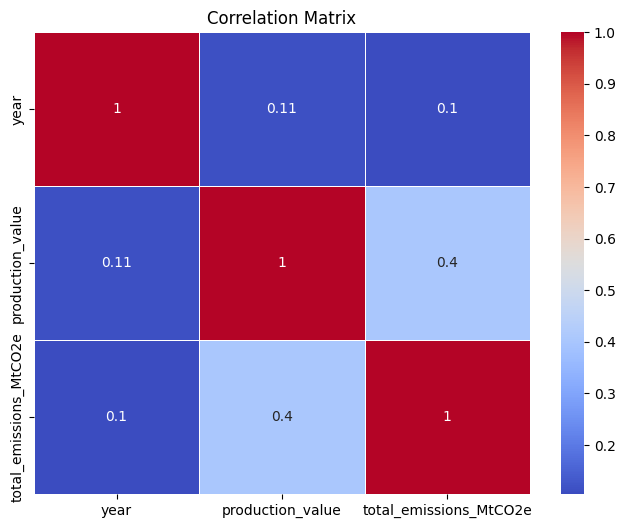

In [18]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

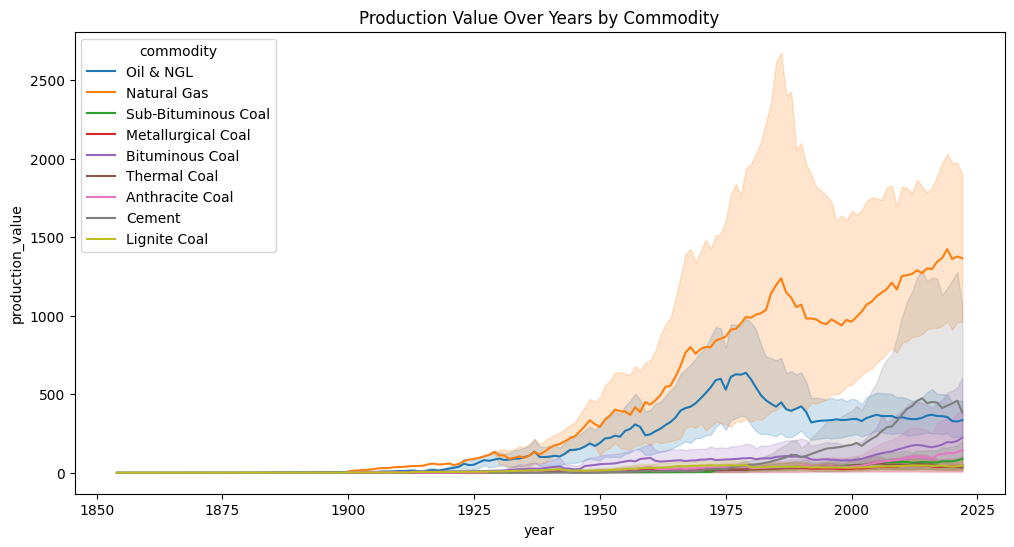

In [19]:
# Production value by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='production_value', hue='commodity')
plt.title('Production Value Over Years by Commodity')
plt.show()

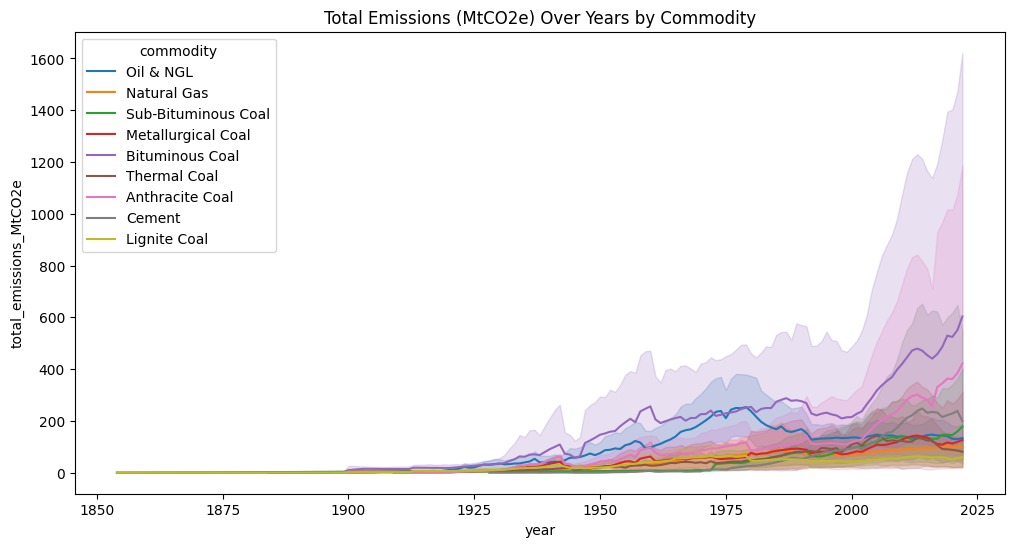

In [20]:
# Total emissions by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='total_emissions_MtCO2e', hue='commodity')
plt.title('Total Emissions (MtCO2e) Over Years by Commodity')
plt.show()